In [51]:
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
from seaborn import axes_style, plotting_context
from IPython.display import display
from tqdm import tqdm

Path.cwd()

PosixPath('/project/cs-myers/MathewF/projects/Laura-SB-Analysis/NetCIS/notebooks')

In [3]:
insertion_files = Path("/project/cs-myers/MathewF/projects/Laura-SB-Analysis/2020_SB-output/GRCm39/results-insertions/")
input_file = Path("/project/cs-myers/MathewF/projects/Laura-SB-Analysis/input-2020_SB.tsv")


In [4]:
insert_list = []
for file in insertion_files.iterdir():
    tmp_df = pd.read_csv(file, sep="\t")
    tumor_model, sample_id, tissue_type = file.name.split("-")
    tmp_df["tumor_model"] = tumor_model
    tmp_df["sample_id"] = sample_id
    tmp_df["tissue"] = tissue_type.split(".")[0]  # RT/LT/S
    insert_list.append(tmp_df)
inserts_df = pd.concat(insert_list, ignore_index=True)
print(f"total reads: {len(inserts_df)}")

file_count = len(inserts_df.groupby(by=["tumor_model", "sample_id", "tissue"]).count())
print(f"number of samples (mouse and tissues) with reads: {file_count}")

in_df = pd.read_csv(input_file, sep="\t", header=None)
print(f"total samples: {len(in_df)}")

total reads: 242351
number of samples (mouse and tissues) with reads: 302
total samples: 312


In [5]:
inserts_df

,chr,pos,strand,ref_length,query_length,read_length,mapping_quality,read_name,TA_location,read_first_last,ref_first_last,tpn_promoter_orient,library,treatment,sampleID,tumor_model,sample_id,tissue
0,chr1,53601100,+,135,147,147,14,K00274:76:HHHM2BBXX:8:2128:16224:28446,none,GATAAATTTG-AGGTCCTAGA,GGAGcAGTTG-AGGTCCTAGA,-,IRL,LT,32_2,EL4,32_2,LT
1,chr1,68392291,+,70,71,71,42,K00274:76:HHHM2BBXX:8:1108:29193:25984,first,TATATATAGA-GCCTCATTTT,TATATATAGA-TGCCTCATTT,+,IRR,LT,32_2,EL4,32_2,LT
2,chr1,68392291,+,71,71,71,42,K00274:76:HHHM2BBXX:8:1227:5974:17685,first,TATATATAGA-GCCTCATTTC,TATATATAGA-GCCTCATTTC,+,IRR,LT,32_2,EL4,32_2,LT
3,chr1,68392291,+,68,68,68,28,K00274:76:HHHM2BBXX:8:2108:24870:26265,first,TATATATAGA-TCTGCCTCAT,TATATATAGA-TCTGCCTCAT,+,IRR,LT,32_2,EL4,32_2,LT
4,chr1,68392291,+,67,67,67,28,K00274:76:HHHM2BBXX:8:2202:3133:47084,first,TATATATAGA-TTCTGCCTCA,TATATATAGA-TTCTGCCTCA,+,IRR,LT,32_2,EL4,32_2,LT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242346,chr6,53233280,-,43,148,148,22,K00275:54:HHHJTBBXX:8:1124:3407:34477,none,GATTAAATGT-CTGCTTGAAA,ATTAAGATAT-AATTCCTGAC,-,IRR,LT,456_4,B16,456_4,LT
242347,chr6,53233280,-,43,72,72,22,K00275:54:HHHJTBBXX:8:1221:22445:26986,none,AGGATTAAAT-GCGGAGCCCT,ATTAAGATAT-AATTCCTGAC,-,IRR,LT,456_4,B16,456_4,LT
242348,chr6,86910729,+,102,146,146,41,K00274:188:HW2KTBBXX:5:2125:20557:21852,none,TTTTGTAAAC-CACCAGTGCT,TAACTAACAA-CACCAGTGCT,+,IRR,RT,46_2,EL4,46_2,RT
242349,chr6,86910822,-,108,148,148,41,K00274:188:HW2KTBBXX:5:1101:6948:19619,none,GTGGATTAAA-ATAGTGAGTC,ACCAGTGCTG-ACAATTCCTG,+,IRL,RT,46_2,EL4,46_2,RT


In [6]:
# TODO: 9/13/23 Meeting with Chad and Wen - plot kernel density of cases vs. controls per chromosome: lineplot of total insertions events within a window size
gb = inserts_df.groupby(["chr", "pos", "treatment"])
ret_list = []
for key, tmp_df in gb:
    print(key)
    display(tmp_df)
    break

('chr1', 3066538, 'RT')


,chr,pos,strand,ref_length,query_length,read_length,mapping_quality,read_name,TA_location,read_first_last,ref_first_last,tpn_promoter_orient,library,treatment,sampleID,tumor_model,sample_id,tissue
42175,chr1,3066538,+,74,74,74,42,K00274:188:HW2KTBBXX:5:2208:11403:40174,first,TATGTGTATG-TCACACTCTA,TATGTGTATG-TCACACTCTA,-,IRL,RT,48_1,EL4,48_1,RT


In [7]:
data_df = inserts_df.groupby(["chr", "pos", "treatment"]).count().iloc[:,0].reset_index(drop=False).rename({"strand": "read_count"}, axis=1)
data_df

,chr,pos,treatment,read_count
0,chr1,3066538,RT,1
1,chr1,3196360,S,1
2,chr1,3196365,S,1
3,chr1,3442017,S,4
4,chr1,3460247,RT,1
...,...,...,...,...
32783,chrY,89953171,RT,1
32784,chrY,89970493,S,2
32785,chrY,90400145,S,1
32786,chrY,90489873,S,2


In [8]:
import bottleneck as bn

In [43]:
window = 50000
gb = data_df.groupby(["chr", "treatment"])
result_dict = {}
for key, tmp_df in tqdm(gb):
    tmp_df = tmp_df.sort_values("pos")
    max_pos = tmp_df["pos"].max()
    pos2_x = np.zeros(max_pos + window)
    pos2_x[tmp_df["pos"]-1] = tmp_df["read_count"]
    chr_treat_sum = bn.move_sum(pos2_x, window)
    result_dict[key] = chr_treat_sum
# 3m46s with nan checker

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████| 65/65 [02:45<00:00,  2.55s/it]


In [45]:
result_dict.keys()

dict_keys([('chr1', 'LT'), ('chr1', 'RT'), ('chr1', 'S'), ('chr10', 'LT'), ('chr10', 'RT'), ('chr10', 'S'), ('chr11', 'LT'), ('chr11', 'RT'), ('chr11', 'S'), ('chr12', 'LT'), ('chr12', 'RT'), ('chr12', 'S'), ('chr13', 'LT'), ('chr13', 'RT'), ('chr13', 'S'), ('chr14', 'LT'), ('chr14', 'RT'), ('chr14', 'S'), ('chr15', 'LT'), ('chr15', 'RT'), ('chr15', 'S'), ('chr16', 'LT'), ('chr16', 'RT'), ('chr16', 'S'), ('chr17', 'LT'), ('chr17', 'RT'), ('chr17', 'S'), ('chr18', 'LT'), ('chr18', 'RT'), ('chr18', 'S'), ('chr19', 'LT'), ('chr19', 'RT'), ('chr19', 'S'), ('chr2', 'LT'), ('chr2', 'RT'), ('chr2', 'S'), ('chr3', 'LT'), ('chr3', 'RT'), ('chr3', 'S'), ('chr4', 'LT'), ('chr4', 'RT'), ('chr4', 'S'), ('chr5', 'LT'), ('chr5', 'RT'), ('chr5', 'S'), ('chr6', 'LT'), ('chr6', 'RT'), ('chr6', 'S'), ('chr7', 'LT'), ('chr7', 'RT'), ('chr7', 'S'), ('chr8', 'LT'), ('chr8', 'RT'), ('chr8', 'S'), ('chr9', 'LT'), ('chr9', 'RT'), ('chr9', 'S'), ('chrM', 'LT'), ('chrM', 'RT'), ('chrX', 'LT'), ('chrX', 'RT'), ('

In [46]:
result_dict[('chr1', 'LT')]

array([nan, nan, nan, ...,  1.,  1.,  0.])

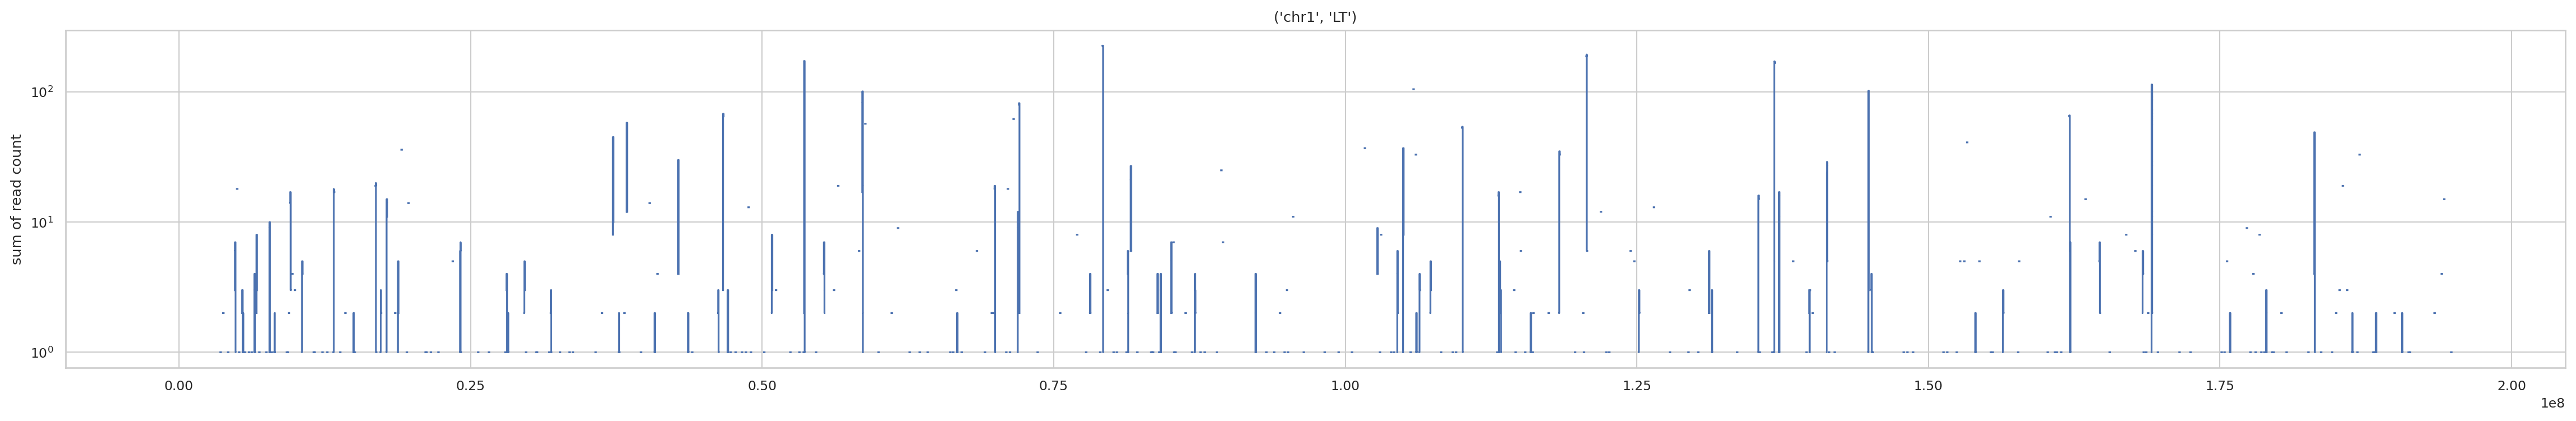

In [41]:
key = ('chr1', 'LT')
values = result_dict[key]
(
    so.Plot(x=np.arange(values.shape[0]), y=values)
    .add(so.Lines())
    .layout(size=(24,4))
    .theme({**axes_style("whitegrid"), **plotting_context("paper")})
    .scale(y="log")
    .label(y="sum of read count", title=key)
)

In [ ]:
graph_files = Path("/project/cs-myers/MathewF/projects/Laura-SB-Analysis/2020_SB-output/GRCm39/results-graphs/")
for key in result_dict.keys():
    print(key)
    chrom, treatment = key
    graph_file = graph_files / treatment / chrom / "subgraphs.pickle"
    with open(graph_file, 'rb') as f:
        subgraphs = pickle.load(f)
    for i, G in enumerate(subgraphs):
        nodes = G.number_of_nodes()
        edges = G.number_of_edges()
        num_inserts = sum([ G.nodes[node]['counts'] for node in G.nodes ])
        tmp_pos = sorted([ G.nodes[node]["position"] for node in G.nodes ])
        min_pos = min(tmp_pos)
        max_pos = max(tmp_pos)
        range_pos = max_pos - min_pos
        print(i, min_pos, max_pos, range_pos)
    break

In [50]:
values = result_dict[key].copy()
values[values == 0] = np.nan
values

plt.margins(0.05)
plt.plot(values, 1, linewidth=2, color='black')
plt.show()

array([nan, nan, nan, ...,  1.,  1., nan])

In [61]:
g = (
    so.Plot(data=data_df, x="pos", y="read_count")
    .add(so.Lines())
    .layout(size=(24,4))
    .theme({**axes_style("whitegrid"), **plotting_context("paper")})
    .scale(y="log")
    .label(y="sum of read count", title=key)
).plot()

In [62]:
# # flatten axes into a 1-d array
# axes = g.axes.flatten()
# # iterate through the axes
# for i, ax in enumerate(axes):
#     ax.axhline(la[i][0], ls='--', c='green')
#     ax.axvline(la[i][1], ls='--', c='purple')
#     ax.text(la[i][2], la[i][3], la[i][4], c='orange')

for x in g._subplots._figure.axes.flatten()

[<Axes: title={'center': "('chr1', 'LT')"}, xlabel='pos', ylabel='sum of read count'>]

In [ ]:
(
    so.Plot(data=data_df, x="pos", y="read_count")
    .add(so.Bars(), so.Hist())  # bins=1000
    .layout(size=(24,4))
    .theme({**axes_style("whitegrid"), **plotting_context("paper")})
    .scale(y="log")
    .label(y="sum of read count", title=key)
)

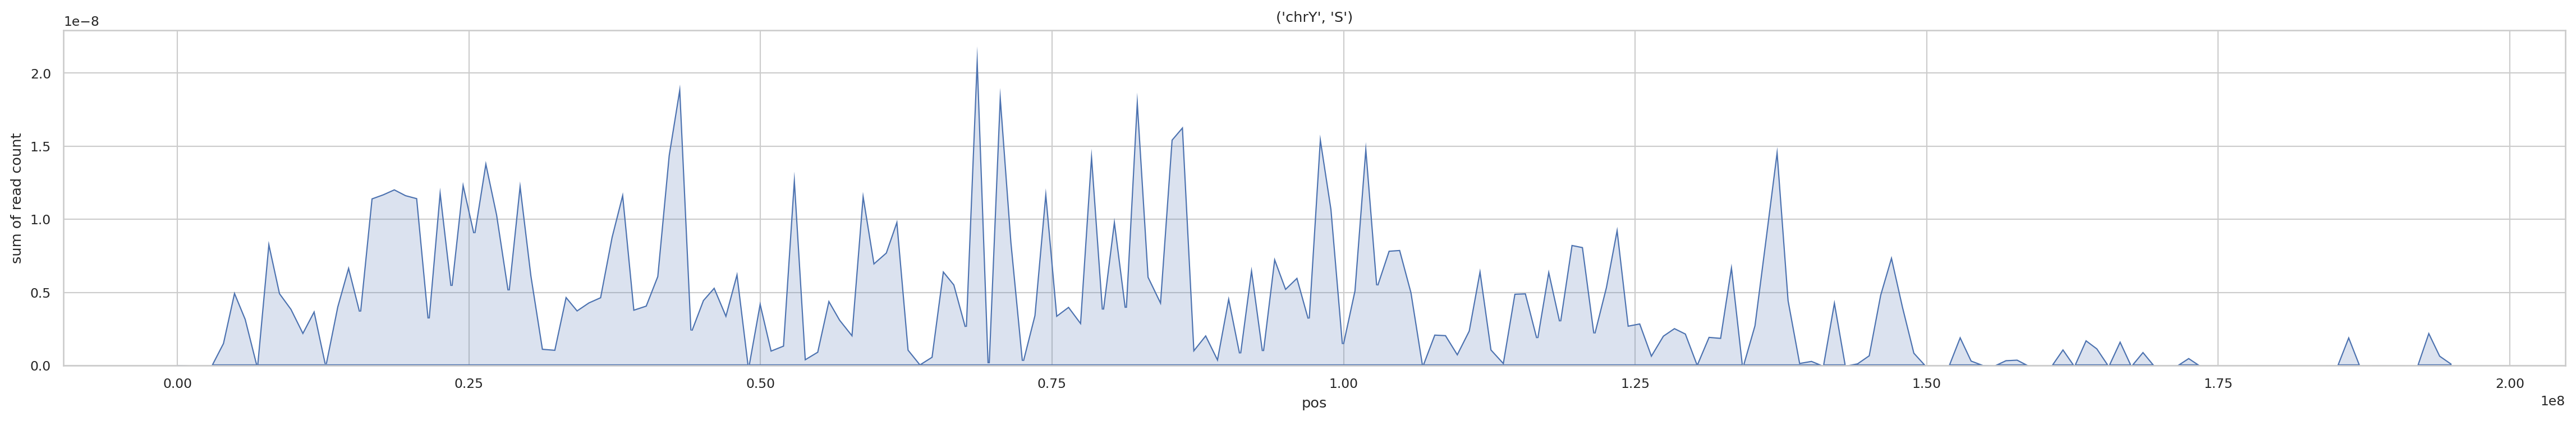

In [32]:
param1 = 0.001
(
    so.Plot(data=data_df, x="pos", y="read_count")
    .add(so.Area(), so.KDE(bw_adjust=param1, common_norm=False, common_grid=False))
    .layout(size=(24,4))
    .theme({**axes_style("whitegrid"), **plotting_context("paper")})
    .label(y="sum of read count", title=key)
)
# TODO: now add dashes for the range of each subgraph in chrom 1 of LT samples

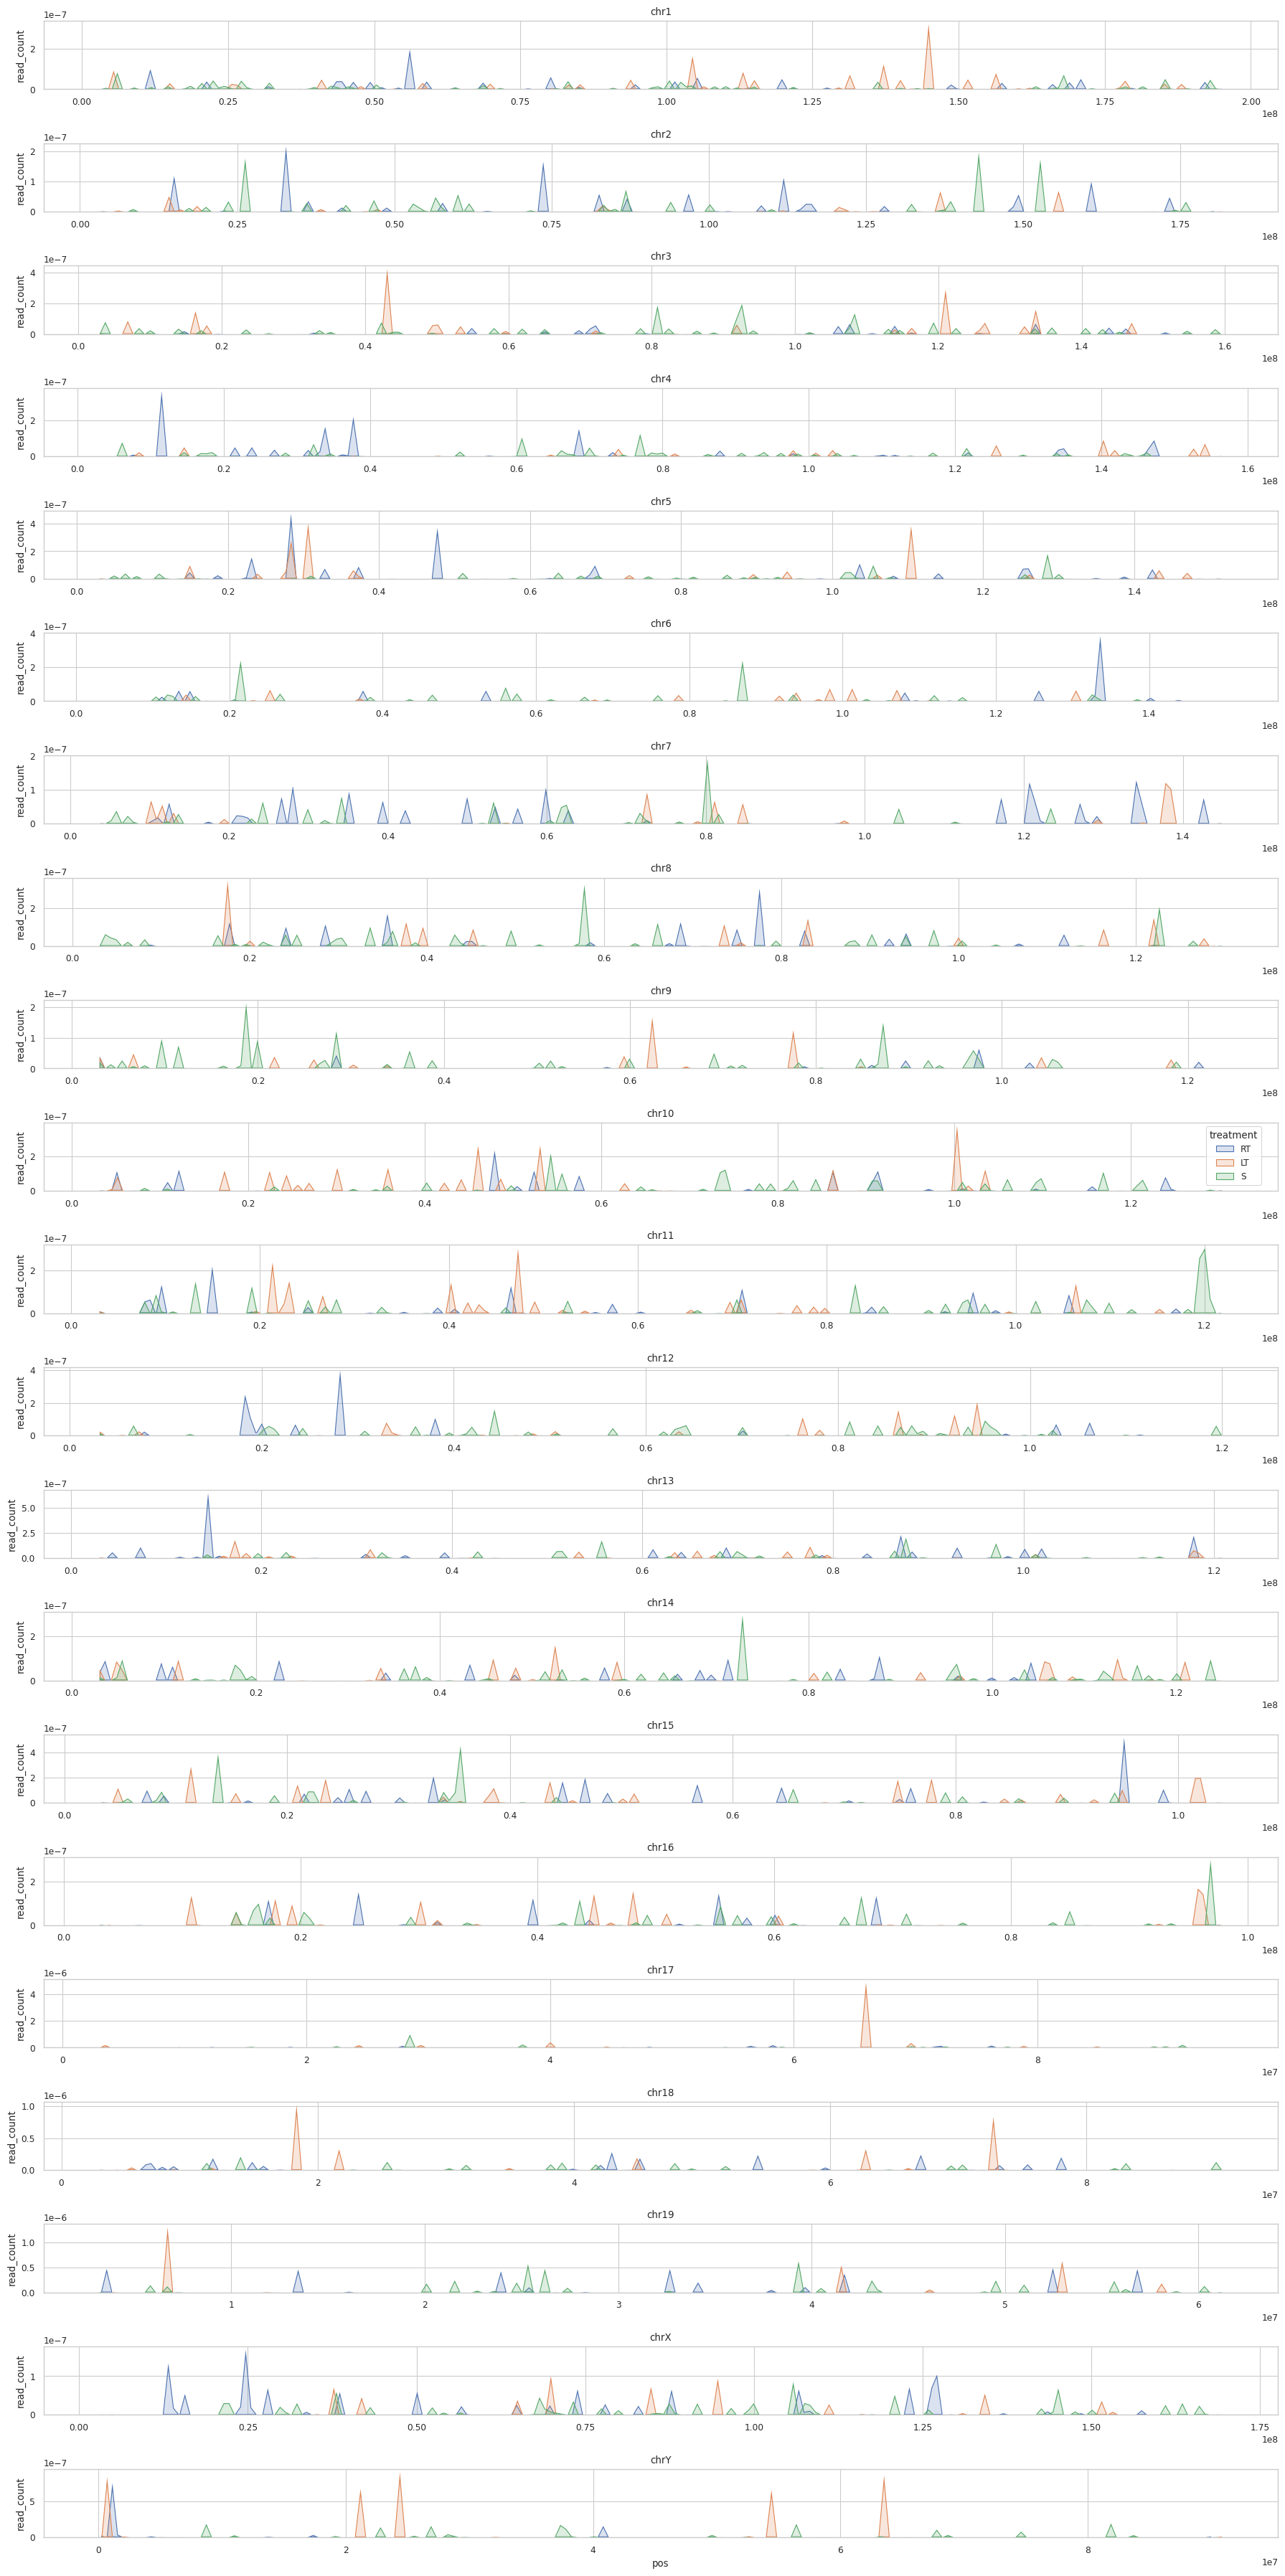

In [30]:
param1 = 0.001
color_order=["RT", "LT", "S"]
chrom_order = [ f'chr{x}' for x in range(1, 20) ] + ['chrX', 'chrY']
g = (
    so.Plot(data=data_df, x="pos", y="read_count", color="treatment")
    .add(so.Area(), so.KDE(bw_adjust=param1, common_norm=False, common_grid=False))
    .facet(row="chr", order=chrom_order)
    .layout(size=(18,36))
    .theme({**axes_style("whitegrid"), **plotting_context("paper")})
    .share(x=False, y=False)
    .scale(color=so.Nominal(order=color_order))
    # .scale(x="symlog")
    # .label(y="count", title="Average Depth Per Chromosome")
)
g.show()

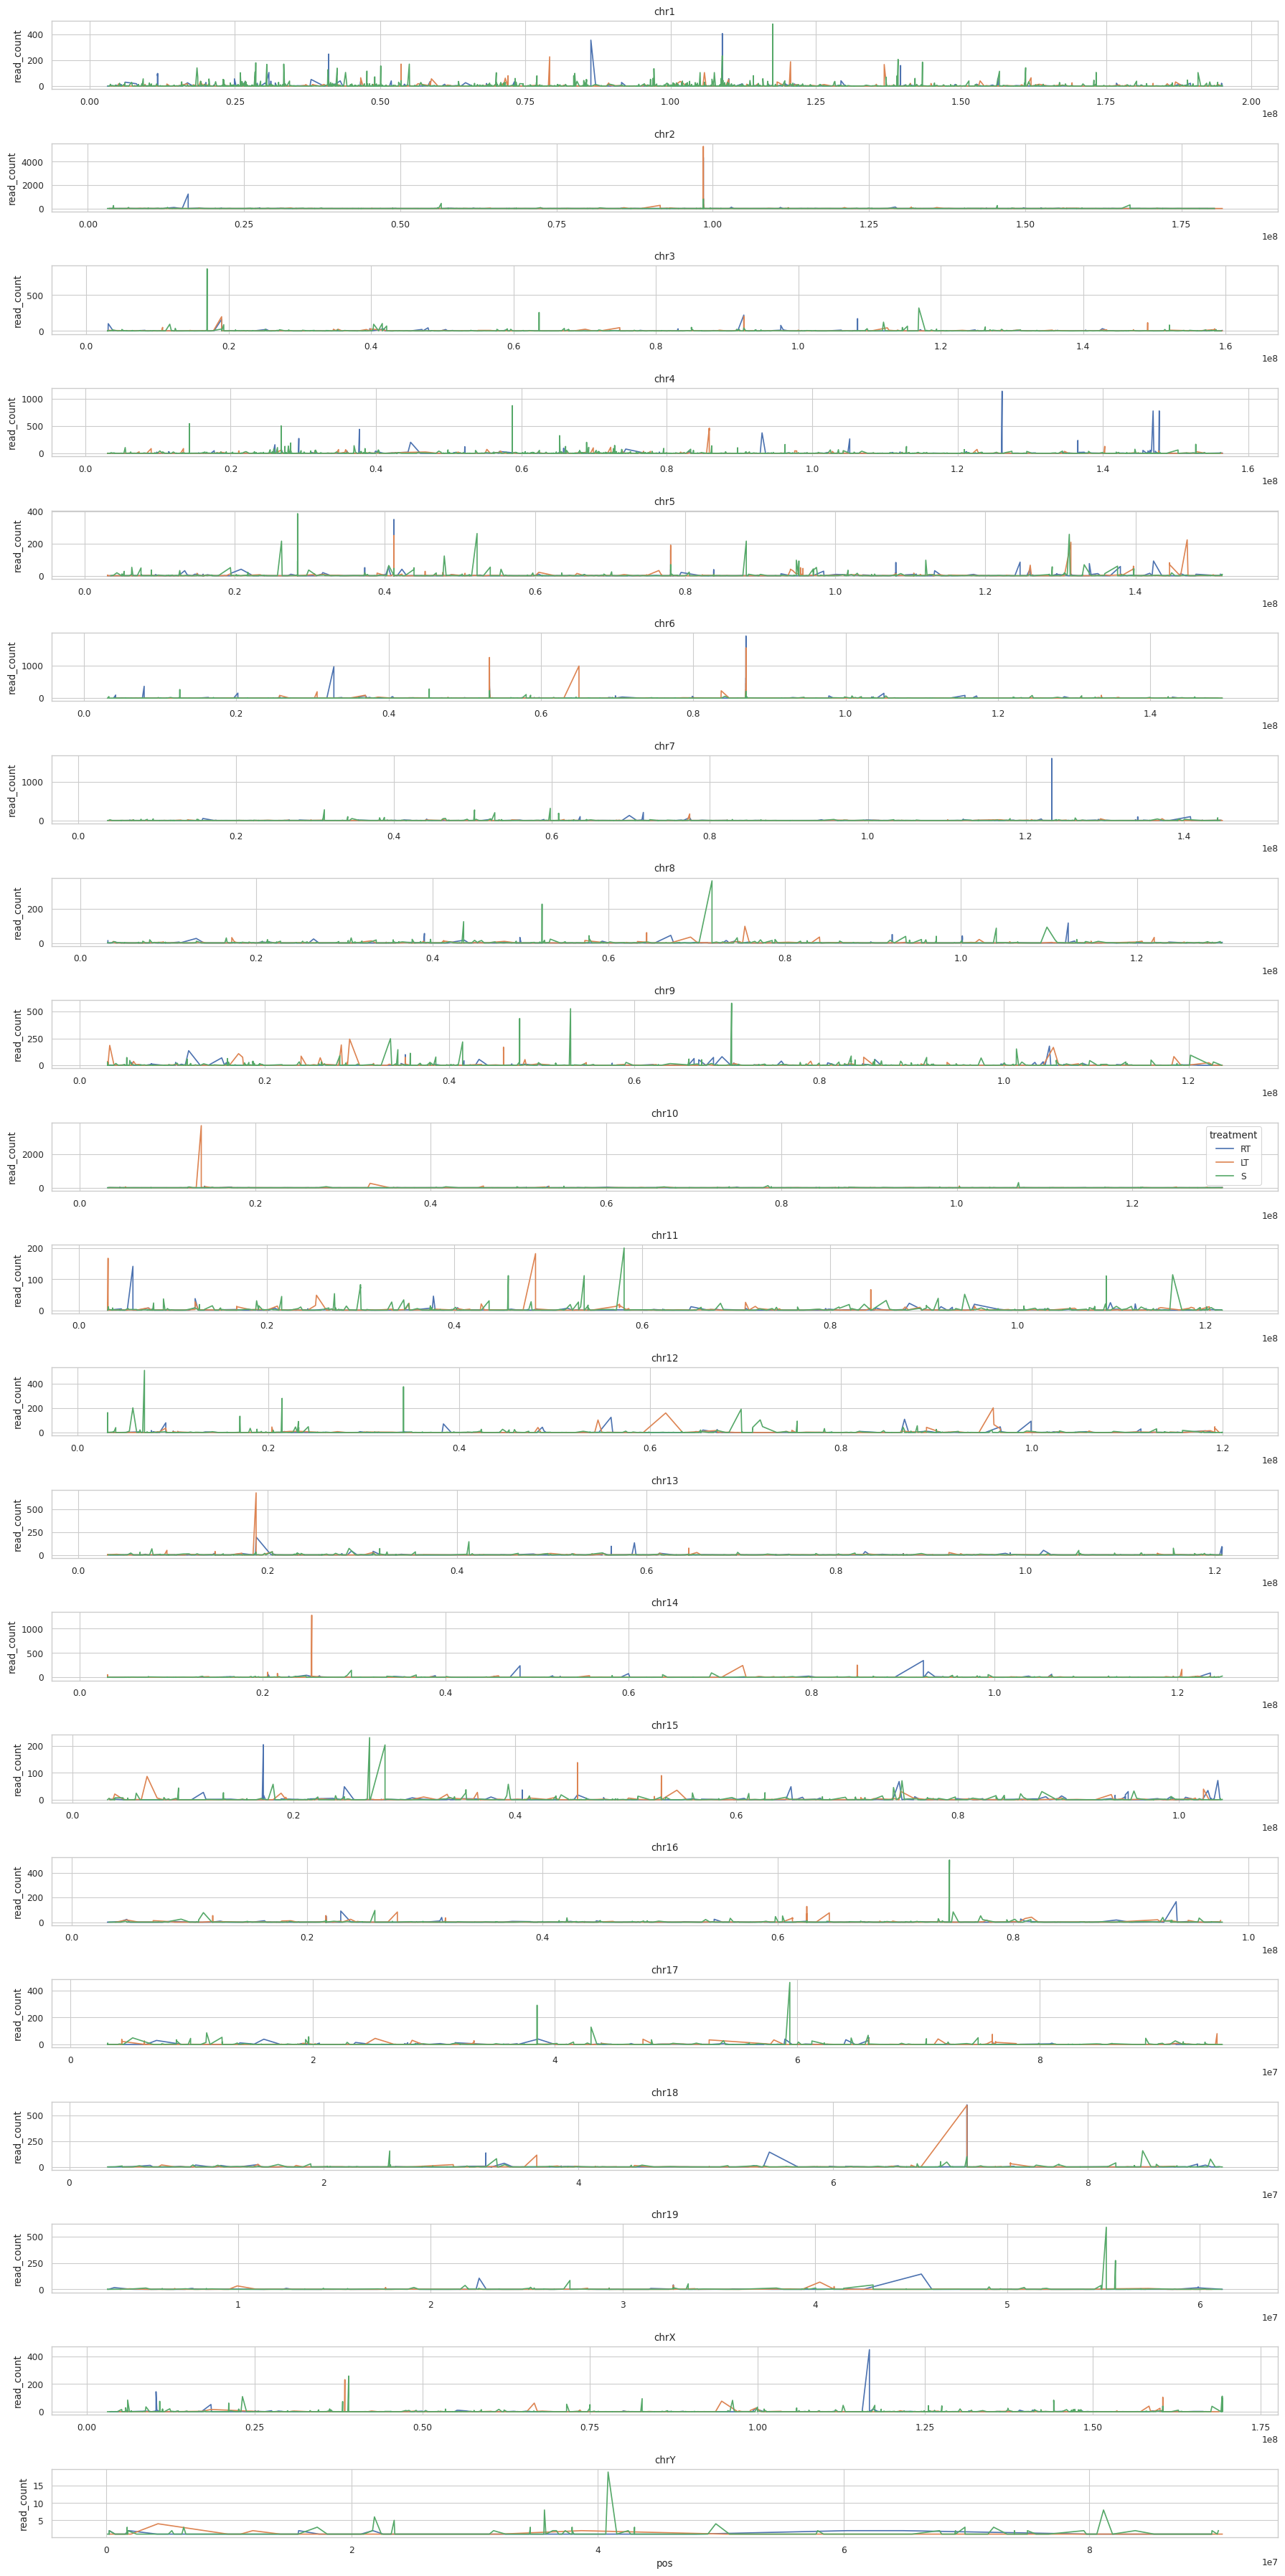

In [24]:
color_order=["RT", "LT", "S"]
chrom_order = [ f'chr{x}' for x in range(1, 20) ] + ['chrX', 'chrY']
g = (
    so.Plot(data=data_df, x="pos", y="read_count", color="treatment")
    .add(so.Lines())
    .facet(row="chr", order=chrom_order)
    .layout(size=(18,36))
    .theme({**axes_style("whitegrid"), **plotting_context("paper")})
    .share(x=False, y=False)
    .scale(color=so.Nominal(order=color_order))
    # .scale(x="symlog")
    # .label(y="count", title="Average Depth Per Chromosome")
)
g.show()

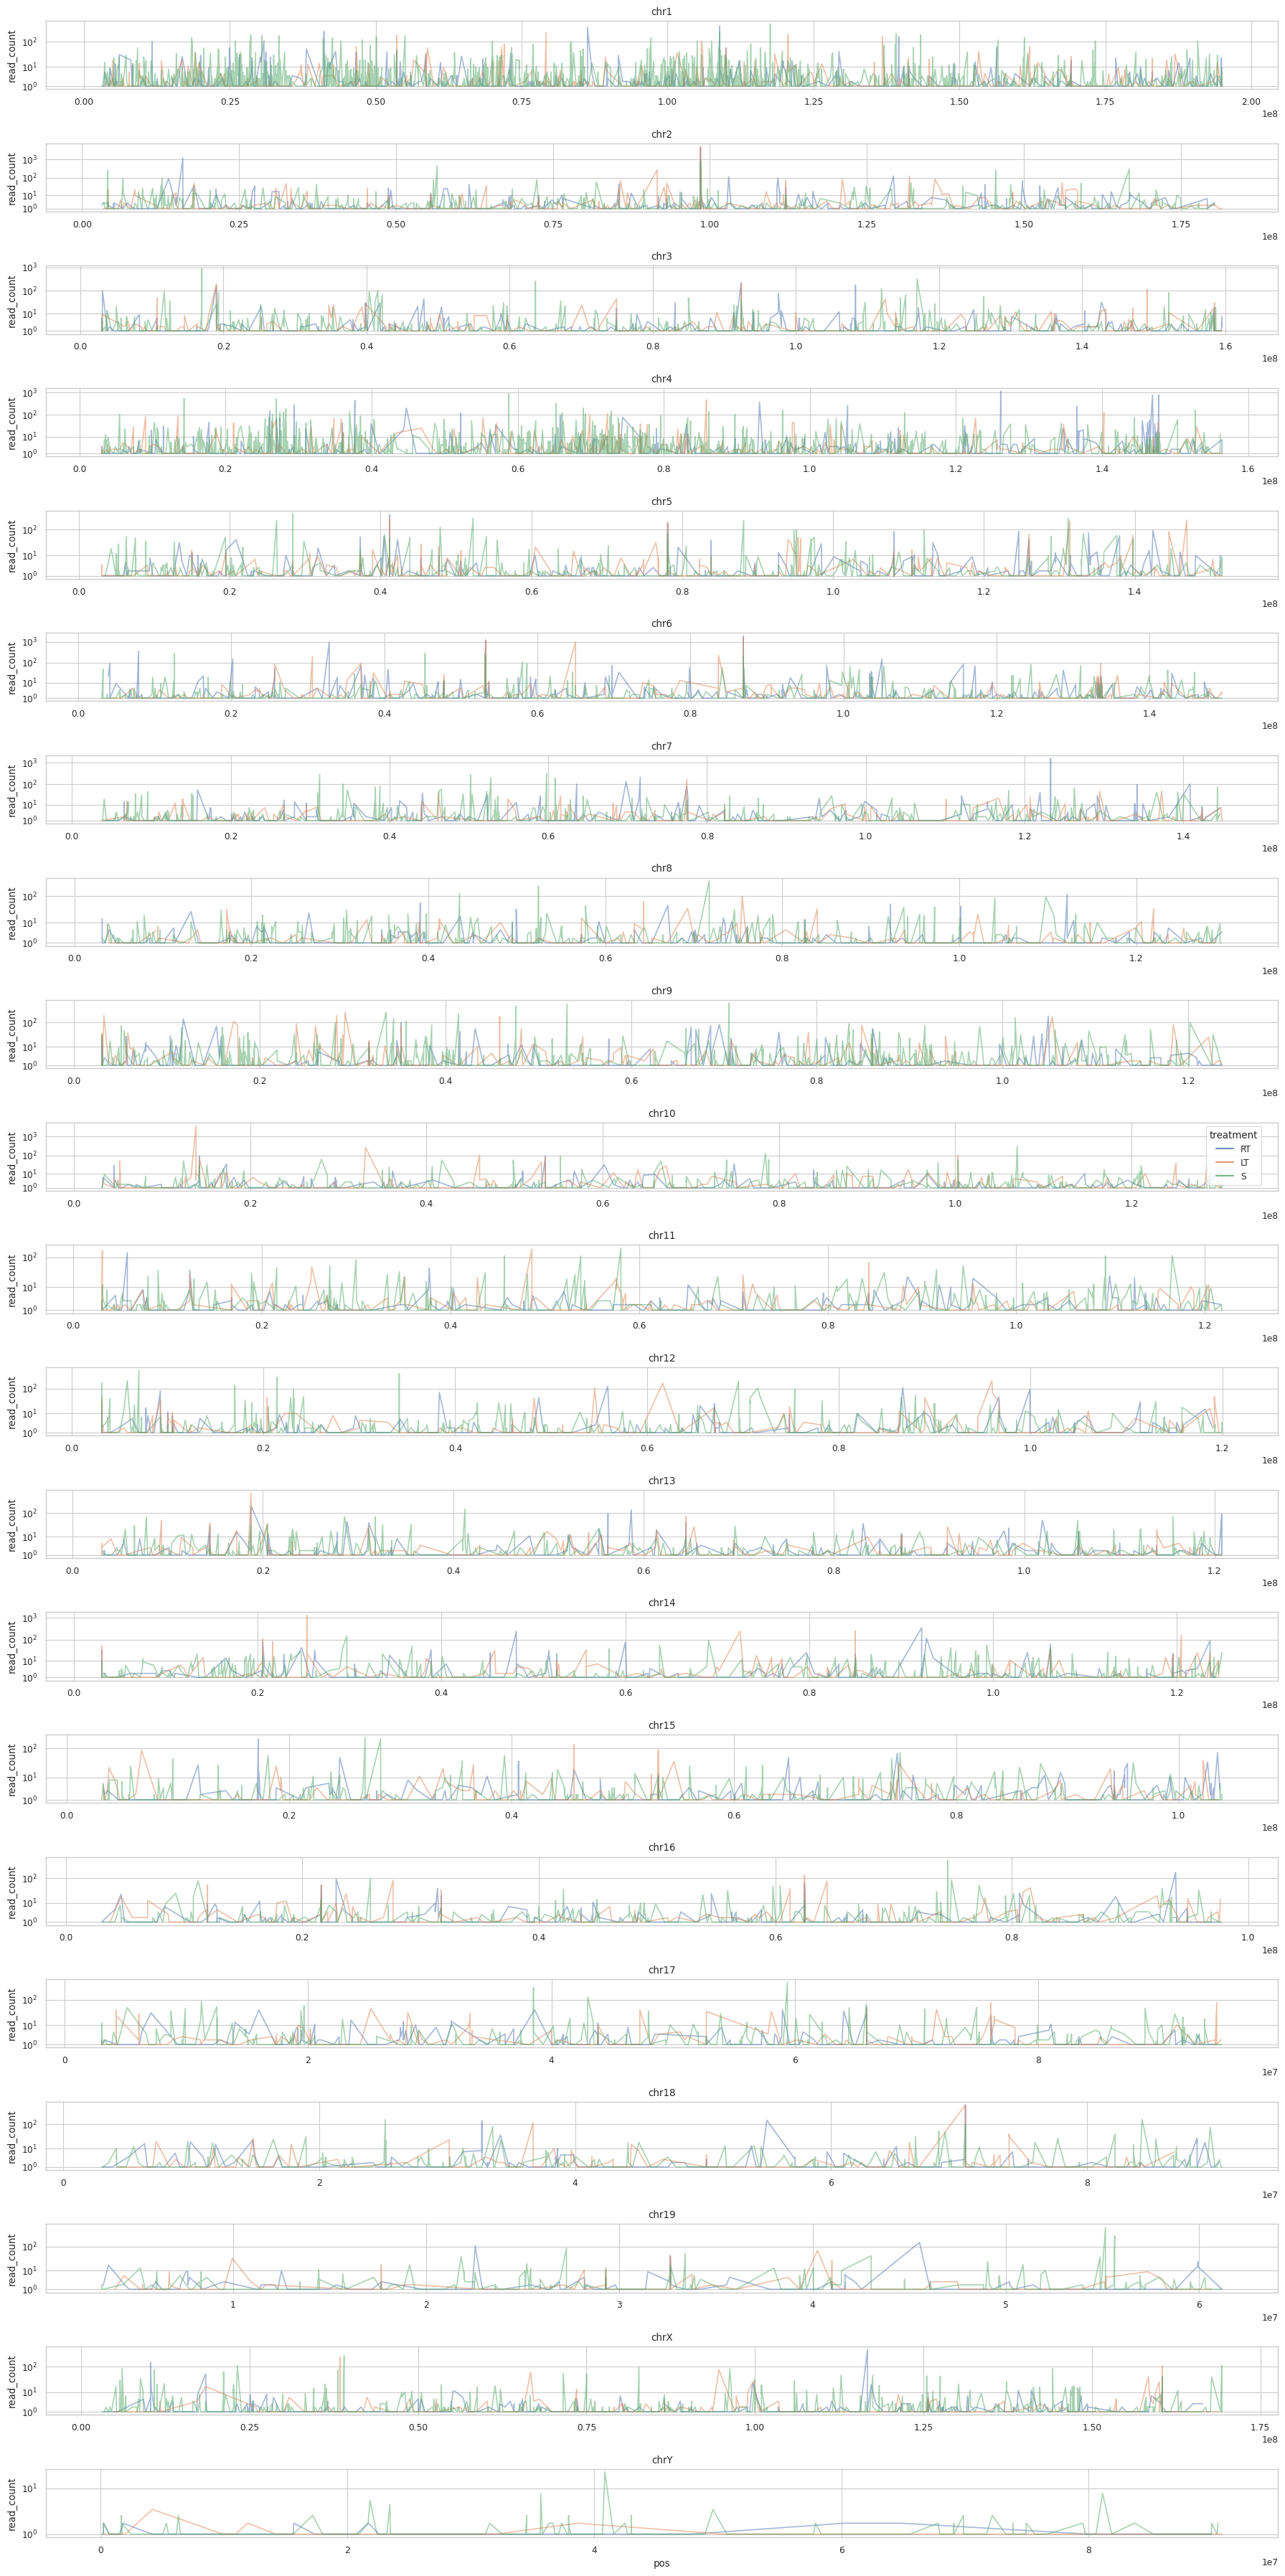

In [27]:
color_order=["RT", "LT", "S"]
chrom_order = [ f'chr{x}' for x in range(1, 20) ] + ['chrX', 'chrY']
g = (
    so.Plot(data=data_df, x="pos", y="read_count", color="treatment")
    .add(so.Lines(alpha=0.5))
    .facet(row="chr", order=chrom_order).share(x=False, y=False).scale(y="symlog")
    .layout(size=(18,36))
    .theme({**axes_style("whitegrid"), **plotting_context("paper")})
    .scale(color=so.Nominal(order=color_order))
    # .label(y="count", title="Average Depth Per Chromosome")
)
g.show()

100000000.0